In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ttest_1samp

In [2]:
df = pd.read_csv('50_Startups.csv', delimiter=';')

# Analyse de la variance des variables indépendantes

### On encode la variable ville avec LabelEncoder pour pouvoir observer sa variance

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['villes'] = labelencoder.fit_transform(df['villes'])

In [4]:
X = df.drop(['Profit'],axis=1)

y = df['Profit']

### On fait une normalisation MinMax afin d'avoir des valeurs pertinentes pour observer les variances

In [5]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
# df = pd.DataFrame(x_scaled)

In [14]:
X_scaled

array([[1.        , 0.65174393, 1.        , 0.5       ],
       [0.98335946, 0.76197173, 0.94089337, 1.        ],
       [0.92798459, 0.37957895, 0.8646636 , 0.        ],
       [0.87313643, 0.51299839, 0.81223513, 0.5       ],
       [0.85943772, 0.30532804, 0.77613557, 0.        ],
       [0.797566  , 0.3694479 , 0.76912588, 0.5       ],
       [0.81412828, 0.73016111, 0.27071031, 1.        ],
       [0.7880179 , 0.71745725, 0.68649342, 0.        ],
       [0.72901786, 0.74173276, 0.66049977, 0.5       ],
       [0.74590551, 0.43692884, 0.64644319, 1.        ],
       [0.61635061, 0.45150637, 0.48573267, 0.        ],
       [0.60884455, 0.30836422, 0.52936195, 1.        ],
       [0.56766982, 0.57883556, 0.52956308, 0.        ],
       [0.55635219, 0.64106561, 0.53555202, 1.        ],
       [0.72539353, 0.8013272 , 0.54370828, 0.        ],
       [0.69261666, 0.54302973, 0.55486446, 0.5       ],
       [0.47180821, 0.53527036, 0.56031151, 1.        ],
       [0.57246821, 0.71401273,

### On plot les variances pour voir si une variable a une petite variance

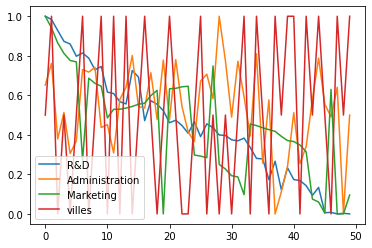

In [15]:
plt.plot(X_scaled)
plt.legend(X.columns)

### Ce plot nous montre que toutes les variables indépendantes varient, donc il est inutile de procéder à une selection par variance.

In [8]:
X_scaled.var(axis=0)

array([0.07552486, 0.04458122, 0.06584512, 0.1649    ])

In [9]:
X.columns

Index(['R&D', 'Administration', 'Marketing', 'villes'], dtype='object')

### Je procède à une selection par variance quand même, pour le sport, et pour savoir comment le faire pour la suite
Mais c'est inutile !

In [17]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.05)

In [18]:
X_scaled = selector.fit_transform(X_scaled)

In [20]:
selector.get_support()

array([ True, False,  True,  True])

Ici, j'ai selectionné un threshold de 0.05 et la variable 'Administration' a donc été enlevée.

### Je ne sais pas à quel point c'est pertinent de faire une selection de variance sur des variables normalisées.
Dans l'exemple que j'ai vu sur la chaine machine learnia, il utilise le dataset iris, qui contient des données déjà "normalisée" car elles sont toutes sur la même unité (cm).